In [3]:
import torch
torch.__version__

'1.3.1'

In [4]:
x = torch.rand(5, 3)
# print(x)
x = torch.zeros(5, 3, dtype=torch.long)
# print(x)
x = torch.tensor([5.5, 3])
# print(x)
x = torch.ones(5, 3, dtype=torch.double)


print(type(x.item))
print(x.size())
print(x)

y = torch.rand(5, 3)
print(x + y)

<class 'builtin_function_or_method'>
torch.Size([5, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[1.4885, 1.3968, 1.5492],
        [1.2027, 1.9136, 1.1277],
        [1.2467, 1.5696, 1.7672],
        [1.6679, 1.0424, 1.4230],
        [1.0175, 1.9733, 1.7792]], dtype=torch.float64)


In [5]:
# 方法二
# print(torch.add(x, y))

# 方法三
# result = torch.empty(5, 3)
# torch.add(x, y, out=result)
# print(result)

# 方法四
# y.add_(x)
# print(y)

In [6]:
print(y[:,1])

tensor([0.3968, 0.9136, 0.5696, 0.0424, 0.9733])


In [7]:
x = torch.randn(4, 4)
y = x.view(16)
print(x.size(),y.size())

torch.Size([4, 4]) torch.Size([16])


In [8]:
x = torch.randn(4, 4)
# x = x.reshape(1,-1)
x.size()

torch.Size([4, 4])

In [9]:
y = x.view(2, 8)
y = x.reshape(2, 8)
print(x.size(),y.size())

x = torch.randn(1)
x.item()

torch.Size([4, 4]) torch.Size([2, 8])


0.7401983737945557

### Numpy的操作

tensor2numpy
<br />
将张量转换成numpy数组

In [10]:
a = torch.ones(5)
print(a)

b = a.numpy()
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


将张量+1，并观察上题中numpy数组的变化

In [11]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


从numpy数组创建张量

In [21]:
import numpy as np
a = np.ones(4)
b = torch.tensor(a)
b = torch.from_numpy(a)
b

tensor([1., 1., 1., 1.], dtype=torch.float64)

将numpy数组+1并观察上题中张量的变化

In [22]:
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2.]
tensor([2., 2., 2., 2.], dtype=torch.float64)


## 自动微分

### 张量的自动微分

新建一个张量，并设置requires_grad=True

In [40]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


对张量进行任意操作（y = x + 2）

In [41]:
y = 2*x**2 + 1
print(y)
print(y.grad_fn)
# out = y.mean()

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [42]:
z = y ** 2 * 3
out = z.mean()

print(z) # z多了MulBackward
print(out) # out多了MeanBackward

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


### 梯度


In [43]:
out.backward()

In [44]:
print(x.grad)

tensor([[18., 18.],
        [18., 18.]])


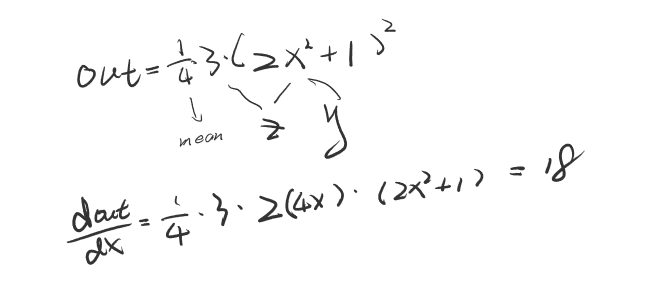

创建一个结果为矢量的计算过程（y=x*2^n）

In [50]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([-59.5318, 726.0163, 771.8844], grad_fn=<MulBackward0>)


计算v = [0.1, 1.0, 0.0001]处的梯度

In [51]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


关闭梯度的功能

In [53]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)
    
# 方法二
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
True
False
True
False
tensor(True)


pytorch a.equal(b) 与a.eq(b) <br/>
a,b是两个列表;<br/>
a.equal(b)要求整个列表完全相同才是True;<br/>
a.eq(b) 相同位置值相同则返回对应的True,返回的是一个列表.

## 神经网络
### 定义网络

In [85]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 26.定义①的卷积层，输入为32x32的图像，卷积核大小5x5卷积核种类6
        self.conv1 = nn.Conv2d(3, 6, 5)
        # 27.定义③的卷积层，输入为前一层6个特征，卷积核大小5x5，卷积核种类16
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 28.定义⑤的全链接层，输入为16*5*5，输出为120
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 6*6 from image dimension
        # 29.定义⑥的全连接层，输入为120，输出为84
        self.fc2 = nn.Linear(120, 84)
        # 30.定义⑥的全连接层，输入为84，输出为10
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # 31.完成input-S2，先卷积+relu，再2x2下采样
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # 32.完成S2-S4，先卷积+relu，再2x2下采样
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) #卷积核方形时，可以只写一个维度
        # 33.将特征向量扁平成行向量
        x = x.view(-1, 16 * 5 * 5)
        # 34.使用fc1+relu
        x = F.relu(self.fc1(x))
        # 35.使用fc2+relu
        x = F.relu(self.fc2(x))
        # 36.使用fc3
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [44]:
# 打印网络的参数
params = list(net.parameters())
# print(params)
print(len(params))
# 打印某一层参数的形状
print(params[0].size())

10
torch.Size([6, 3, 5, 5])


In [45]:
#随机输入一个向量，查看前向传播输出
input = torch.randn(1, 3, 32, 32)
# print(input)
out = net(input)
print(out)

tensor([[-0.0495,  0.0040, -0.0026, -0.0695, -0.0843,  0.0612,  0.1408, -0.0546,
         -0.0449, -0.0566]], grad_fn=<AddmmBackward>)


In [46]:
#将梯度初始化
net.zero_grad()
#随机一个梯度进行反向传播
out.backward(torch.randn(1, 10))

In [49]:
print(net.conv1.bias.grad)

tensor([ 0.0215,  0.0639, -0.0101,  0.0102,  0.0425,  0.0004])


### 损失函数
用自带的MSELoss()定义损失函数

In [66]:
criterion = nn.MSELoss()

# 随机一个真值，并用随机的输入计算损失

target = torch.randn(10)  # 随机真值
target = target.view(1, -1)  # 变成行向量

output = net(input)  # 用随机输入计算输出

loss = criterion(output, target)  # 计算损失
print(loss)

tensor(0.8646, grad_fn=<MseLossBackward>)


In [67]:
# 将梯度初始化，计算上一步中loss的反向传播

net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])


In [68]:
# 计算上上一步中loss的反向传播

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad after backward
tensor([0.0072, 0.0010, 0.0057, 0.0040, 0.0094, 0.0036])


### 更新权重
定义SGD优化器算法，学习率设置为0.01

In [69]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 使用优化器更新权重
optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()

# 更新权重
optimizer.step()

## 训练一个分类器

### 读取CIFAR10数据，做标准化

构造一个transform，将三通道(0,1)区间的数据转换成(-1,1)的数据

In [70]:
import torchvision
import torchvision.transforms as transforms

# transform = transforms.Compose(
#     [transforms.ToTensor(),
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [83]:
# 读取数据集
transform = transforms.Compose(
    [
     transforms.RandomHorizontalFlip(),
     transforms.RandomGrayscale(),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform1 = transforms.Compose(
    [
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='D:/workingspace/Datasets/', train=True,
                                        download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='D:/workingspace/Datasets/', train=False,
                                       download=False, transform=transform1)
testloader = torch.utils.data.DataLoader(testset, batch_size=50,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [86]:
net2 = Net()
criterion2 = nn.CrossEntropyLoss()
optimizer2 = optim.SGD(net2.parameters(), lr=0.001, momentum=0.9)

In [104]:
for epoch in range(2): 

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 获取X,y对
        inputs, labels = data
#         print(data)

        # 51.初始化梯度
        optimizer2.zero_grad()

        # 52.前馈
        outputs = net2(inputs)
        # 53.计算损失
        loss = criterion2(outputs, labels)
        # 54.计算梯度
        loss.backward()
        # 55.更新权值
        optimizer2.step()

        # 每2000个数据打印平均代价函数值
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

Finished Training


In [105]:
import matplotlib.pyplot as plt
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
# plt.imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
torchvision.utils.make_grid(images).size()

GroundTruth:    cat  ship  ship plane


torch.Size([3, 240, 274])

In [106]:
outputs = net2(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


In [107]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net2(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 39 %


In [ ]:
# 4.6 存取模型
# 58.保存训练好的模型

# PATH = './cifar_net.pth'
# torch.save(net.state_dict(), PATH)
# 59.读取保存的模型

# pretrained_net = torch.load(PATH)
# 60.加载模型

# net3 = Net()

# net3.load_state_dict(pretrained_net)